In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing  dataset
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
df.describe()


Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#before doing the null  value  treatment let us rename all the columns without any space in between the words

df = df.rename(columns = {'Prospect ID' : 'ProspectID', 'Lead Number' : 'LeadNumber', 'Lead Origin' : 'LeadOrigin', 
                          'Lead Source' : 'LeadSource', 'Do Not Email' :'DoNotEmail', 'Do Not Call': 'DoNotCall',
                          'Total Time Spent on Website' : 'TotalTimeSpentonWebsite', 'Page Views Per Visit': 'PageViewsPerVisit',
                          'Last Activity': 'LastActivity','How did you hear about X Education' :'HowdidyouhearaboutXEducation',
                          'What is your current occupation': 'Whatisyourcurrentoccupation', 
                          'What matters most to you in choosing a course': 'Whatmattersmosttoyouinchoosingacourse',
                          'Newspaper Article': 'NewspaperArticle'})

In [9]:
df = df.rename(columns = {'X Education Forums' : 'XEducationForums', 'Digital Advertisement':'DigitalAdvertisement', 
                          'Through Recommendations ' : 'ThroughRecommendations ', 'Receive More Updates About Our Courses' :'ReceiveMoreUpdatesAboutOurCourses', 'Lead Quality': 'LeadQuality',
                          'Update me on Supply Chain Content' : 'UpdatemeonSupplyChainContent', 'Get updates on DM Content': 'GetupdatesonDMContent',
                          'Lead Profile': 'LeadProfile','Asymmetrique Activity Index' :'AsymmetriqueActivityIndex',
                          'Asymmetrique Profile Index': 'AsymmetriqueProfileIndex', 
                          'Asymmetrique Activity Score': 'AsymmetriqueActivityScore','Asymmetrique Profile Score':'AsymmetriqueProfileScore',
                          'I agree to pay the amount through cheque': 'Iagreetopaytheamountthroughcheque', 'A free copy of Mastering The Interview':'AfreecopyofMasteringTheInterview',
                           'Last Notable Activity':'LastNotableActivity'})

In [10]:
#Again inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)

ProspectID                                0.00
LeadNumber                                0.00
LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
TotalVisits                               1.48
TotalTimeSpentonWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Country                                  26.63
Specialization                           15.56
HowdidyouhearaboutXEducation             23.89
Whatisyourcurrentoccupation              29.11
Whatmattersmosttoyouinchoosingacourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvert

In [11]:
#remove the columns with null values more than 40% 
#removing the ProspectID , LeadNumber as not used for analysis
#remove Country and city as the course is online
#tags as having null values almost nearing to 40 and imputing it will lead to lot of assumptions 
#which will  create problem in analysis
df.drop(['AsymmetriqueProfileScore', 'AsymmetriqueActivityScore', 'AsymmetriqueProfileIndex', 'AsymmetriqueActivityIndex', 'LeadQuality', 
         'ProspectID', 'LeadNumber','City', 'Country', 'Tags'], axis=1, inplace=True)                                

          
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)

LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
TotalVisits                               1.48
TotalTimeSpentonWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Specialization                           15.56
HowdidyouhearaboutXEducation             23.89
Whatisyourcurrentoccupation              29.11
Whatmattersmosttoyouinchoosingacourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
Through Recommendations                   0.00
ReceiveMoreUpdatesAboutOurCourses         0.00
UpdatemeonSup

In [12]:
#get the unique values of individual columns
#then think whether the columns should be dropped or not
df['LeadOrigin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [13]:
df['LeadSource'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [14]:
df['DoNotEmail'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['DoNotCall'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['Converted'].unique()

array([0, 1], dtype=int64)

In [17]:
df['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,  nan,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,
        18.,  20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,
        28.,  26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [18]:
df['TotalTimeSpentonWebsite'].unique()

array([   0,  674, 1532, ...,  603,  483,  927], dtype=int64)

In [19]:
df['PageViewsPerVisit'].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,   nan,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,
        2.57,  2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,
        3.2 ,  1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,
        1.83,  3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,
        2.9 ,  1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,
        1.86,  2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,
        4.4 ,  3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,
        2.13,  2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,
        3.8 ,  1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [20]:
df['LastActivity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [21]:
#Specialization
df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [22]:
df['HowdidyouhearaboutXEducation'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [23]:
df['Whatisyourcurrentoccupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [24]:
df['Whatmattersmosttoyouinchoosingacourse'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [25]:
df['Search'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['Magazine'].unique()

array(['No'], dtype=object)

In [27]:
df['NewspaperArticle'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df['XEducationForums'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df['Newspaper'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df['DigitalAdvertisement'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['Through Recommendations'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['ReceiveMoreUpdatesAboutOurCourses'].unique()

array(['No'], dtype=object)

In [33]:
df['UpdatemeonSupplyChainContent'].unique()

array(['No'], dtype=object)

In [34]:
df['GetupdatesonDMContent'].unique()

array(['No'], dtype=object)

In [34]:
df['Iagreetopaytheamountthroughcheque'].unique()

array(['No'], dtype=object)

In [35]:
df['AfreecopyofMasteringTheInterview'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df['LastNotableActivity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [37]:
df['LeadProfile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [38]:
#it is given that select options in some of the columns must be treated as null values as it doesnt add any information to
#the analysis hence let us replace null values in column
#HowdidyouhearaboutXEducation, #Specialization

df.loc[pd.isnull(df['HowdidyouhearaboutXEducation']), ['HowdidyouhearaboutXEducation']] = 'Select'
df.loc[pd.isnull(df['Specialization']), ['Specialization']] = 'Select'


In [39]:
df['HowdidyouhearaboutXEducation'].value_counts()

Select                   7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: HowdidyouhearaboutXEducation, dtype: int64

In [40]:
df['Specialization'].value_counts()

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [41]:
#calculate null now in each above column
#7250/9240= 78.46% for HowdidyouhearaboutXEducation
#3380/9240~36.58% for Specialization 
#we cannot assume this many null values
#drop it
df.drop(['HowdidyouhearaboutXEducation', 'Specialization'] , axis=1, inplace=True)
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)


LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
TotalVisits                               1.48
TotalTimeSpentonWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Whatisyourcurrentoccupation              29.11
Whatmattersmosttoyouinchoosingacourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
Through Recommendations                   0.00
ReceiveMoreUpdatesAboutOurCourses         0.00
UpdatemeonSupplyChainContent              0.00
GetupdatesonDMContent                     0.00
LeadProfile  

In [42]:
#there are columns in dataframe without any variation just drop it

df.drop(['Iagreetopaytheamountthroughcheque', 'GetupdatesonDMContent', 'UpdatemeonSupplyChainContent', 'ReceiveMoreUpdatesAboutOurCourses', 'Magazine'] , axis=1, inplace=True)
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)


LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
TotalVisits                               1.48
TotalTimeSpentonWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Whatisyourcurrentoccupation              29.11
Whatmattersmosttoyouinchoosingacourse    29.32
Search                                    0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
Through Recommendations                   0.00
LeadProfile                              29.32
AfreecopyofMasteringTheInterview          0.00
LastNotableActivity                       0.00
dtype: float64

In [43]:
df.shape

(9240, 20)

In [44]:
# Write your code for dropping the rows here
df = df[df.isnull().sum(axis=1) <= 5]
round(100*(df.isnull().sum()/len(df.index)), 2)

LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
TotalVisits                               1.48
TotalTimeSpentonWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Whatisyourcurrentoccupation              29.11
Whatmattersmosttoyouinchoosingacourse    29.32
Search                                    0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
Through Recommendations                   0.00
LeadProfile                              29.32
AfreecopyofMasteringTheInterview          0.00
LastNotableActivity                       0.00
dtype: float64

In [45]:
#get  the value count of all the columns with higher null values
df['LeadProfile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: LeadProfile, dtype: int64

In [46]:
df['Whatmattersmosttoyouinchoosingacourse'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Whatmattersmosttoyouinchoosingacourse, dtype: int64

In [47]:
#Whatisyourcurrentoccupatio
df['Whatisyourcurrentoccupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Whatisyourcurrentoccupation, dtype: int64

In [48]:
#If  we look at the lead profile column select =4146 which are nearly null values but dropping this column will severly affect 
#Analysis secondly we cannot replace the select with potential lead even though it ranks highest in number after select
#because  we cannot have those number of leads hence replace it with other leads

df.loc[pd.isnull(df['LeadProfile']), ['LeadProfile']] = 'Other Leads'
round(100*(df.isnull().sum()/len(df.index)), 2)


LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
TotalVisits                               1.48
TotalTimeSpentonWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Whatisyourcurrentoccupation              29.11
Whatmattersmosttoyouinchoosingacourse    29.32
Search                                    0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
Through Recommendations                   0.00
LeadProfile                               0.00
AfreecopyofMasteringTheInterview          0.00
LastNotableActivity                       0.00
dtype: float64

In [49]:
#replace select in lead profile by other leads
#The reason is similar to above
df['LeadProfile']=df['LeadProfile'].replace(['Select'], 'Other Leads')
round(100*(df.isnull().sum()/len(df.index)), 2)


LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
TotalVisits                               1.48
TotalTimeSpentonWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Whatisyourcurrentoccupation              29.11
Whatmattersmosttoyouinchoosingacourse    29.32
Search                                    0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
Through Recommendations                   0.00
LeadProfile                               0.00
AfreecopyofMasteringTheInterview          0.00
LastNotableActivity                       0.00
dtype: float64

In [50]:
#replace null with top ranked attribute in columns
df.loc[pd.isnull(df['Whatisyourcurrentoccupation']), ['Whatisyourcurrentoccupation']] = 'Unemployed'
round(100*(df.isnull().sum()/len(df.index)), 2)

LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
TotalVisits                               1.48
TotalTimeSpentonWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Whatisyourcurrentoccupation               0.00
Whatmattersmosttoyouinchoosingacourse    29.32
Search                                    0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
Through Recommendations                   0.00
LeadProfile                               0.00
AfreecopyofMasteringTheInterview          0.00
LastNotableActivity                       0.00
dtype: float64

In [51]:
#Similarly replace null here
df.loc[pd.isnull(df['Whatmattersmosttoyouinchoosingacourse']), ['Whatmattersmosttoyouinchoosingacourse']] = 'Better Career Prospects'
round(100*(df.isnull().sum()/len(df.index)), 2)

LeadOrigin                               0.00
LeadSource                               0.39
DoNotEmail                               0.00
DoNotCall                                0.00
Converted                                0.00
TotalVisits                              1.48
TotalTimeSpentonWebsite                  0.00
PageViewsPerVisit                        1.48
LastActivity                             1.11
Whatisyourcurrentoccupation              0.00
Whatmattersmosttoyouinchoosingacourse    0.00
Search                                   0.00
NewspaperArticle                         0.00
XEducationForums                         0.00
Newspaper                                0.00
DigitalAdvertisement                     0.00
Through Recommendations                  0.00
LeadProfile                              0.00
AfreecopyofMasteringTheInterview         0.00
LastNotableActivity                      0.00
dtype: float64

In [52]:
df['LastActivity'].value_counts()


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: LastActivity, dtype: int64

In [53]:
#it is ok to remove these rows
df= df[~pd.isnull(df['LastActivity'])]
round(100*(df.isnull().sum()/len(df.index)), 2)

LeadOrigin                               0.00
LeadSource                               0.37
DoNotEmail                               0.00
DoNotCall                                0.00
Converted                                0.00
TotalVisits                              0.37
TotalTimeSpentonWebsite                  0.00
PageViewsPerVisit                        0.37
LastActivity                             0.00
Whatisyourcurrentoccupation              0.00
Whatmattersmosttoyouinchoosingacourse    0.00
Search                                   0.00
NewspaperArticle                         0.00
XEducationForums                         0.00
Newspaper                                0.00
DigitalAdvertisement                     0.00
Through Recommendations                  0.00
LeadProfile                              0.00
AfreecopyofMasteringTheInterview         0.00
LastNotableActivity                      0.00
dtype: float64

In [54]:
df['LeadSource'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
youtubechannel          1
welearnblog_Home        1
Name: LeadSource, dtype: int64

In [55]:
df= df[~pd.isnull(df['LeadSource'])]
round(100*(df.isnull().sum()/len(df.index)), 2)

LeadOrigin                               0.00
LeadSource                               0.00
DoNotEmail                               0.00
DoNotCall                                0.00
Converted                                0.00
TotalVisits                              0.32
TotalTimeSpentonWebsite                  0.00
PageViewsPerVisit                        0.32
LastActivity                             0.00
Whatisyourcurrentoccupation              0.00
Whatmattersmosttoyouinchoosingacourse    0.00
Search                                   0.00
NewspaperArticle                         0.00
XEducationForums                         0.00
Newspaper                                0.00
DigitalAdvertisement                     0.00
Through Recommendations                  0.00
LeadProfile                              0.00
AfreecopyofMasteringTheInterview         0.00
LastNotableActivity                      0.00
dtype: float64

In [56]:
df= df[~pd.isnull(df['PageViewsPerVisit'])]
round(100*(df.isnull().sum()/len(df.index)), 2)

LeadOrigin                               0.0
LeadSource                               0.0
DoNotEmail                               0.0
DoNotCall                                0.0
Converted                                0.0
TotalVisits                              0.0
TotalTimeSpentonWebsite                  0.0
PageViewsPerVisit                        0.0
LastActivity                             0.0
Whatisyourcurrentoccupation              0.0
Whatmattersmosttoyouinchoosingacourse    0.0
Search                                   0.0
NewspaperArticle                         0.0
XEducationForums                         0.0
Newspaper                                0.0
DigitalAdvertisement                     0.0
Through Recommendations                  0.0
LeadProfile                              0.0
AfreecopyofMasteringTheInterview         0.0
LastNotableActivity                      0.0
dtype: float64

In [57]:
df.shape

(9074, 20)

In [58]:
#valuing yes no as 1,0
# List of variables to map

varlist =  ['AfreecopyofMasteringTheInterview', 'Through Recommendations', 'DigitalAdvertisement', 'Newspaper', 'Search',
            'DoNotEmail', 'DoNotCall', 'XEducationForums', 'NewspaperArticle']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

LeadOrigin      LeadSource  DoNotEmail  DoNotCall  Converted  \
0                      API      Olark Chat           0          0          0   
1                      API  Organic Search           0          0          0   
2  Landing Page Submission  Direct Traffic           0          0          1   
3  Landing Page Submission  Direct Traffic           0          0          0   
4  Landing Page Submission          Google           0          0          1   

   TotalVisits  TotalTimeSpentonWebsite  PageViewsPerVisit  \
0          0.0                        0                0.0   
1          5.0                      674                2.5   
2          2.0                     1532                2.0   
3          1.0                      305                1.0   
4          2.0                     1428                1.0   

              LastActivity Whatisyourcurrentoccupation  \
0  Page Visited on Website                  Unemployed   
1             Email Opened                  Unemployed   
2             Email Opened                     Student   
3              Unreachable                  Unemployed   
4        Converted to Lead                  Unemployed   

  Whatmattersmosttoyouinchoosingacourse  Search  NewspaperArticle  \
0               Better Career Prospects       0                 0   
1               Better Career Prospects       0                 0   
2               Better Career Prospects       0                 0   
3               Better Career Prospects       0                 0   
4               Better Career Prospects       0                 0   

   XEducationForums  Newspaper  DigitalAdvertisement  Through Recommendations  \
0                 0          0                     0                        0   
1                 0          0                     0                        0   
2                 0          0                     0                        0   
3                 0          0                     0                        0   
4                 0          0                     0                        0   

      LeadProfile  AfreecopyofMasteringTheInterview LastNotableActivity  
0     Other Leads                                 0            Modified  
1     Other Leads                                 0        Email Opened  
2  Potential Lead                                 1        Email Opened  
3     Other Leads                                 0            Modified  
4     Other Leads                                 0            Modified

In [59]:
#to reduce the number of columns and visualise together
df['Lead_os']= df['LeadOrigin']+"_"+ df['LeadSource']
df.head()

LeadOrigin      LeadSource  DoNotEmail  DoNotCall  Converted  \
0                      API      Olark Chat           0          0          0   
1                      API  Organic Search           0          0          0   
2  Landing Page Submission  Direct Traffic           0          0          1   
3  Landing Page Submission  Direct Traffic           0          0          0   
4  Landing Page Submission          Google           0          0          1   

   TotalVisits  TotalTimeSpentonWebsite  PageViewsPerVisit  \
0          0.0                        0                0.0   
1          5.0                      674                2.5   
2          2.0                     1532                2.0   
3          1.0                      305                1.0   
4          2.0                     1428                1.0   

              LastActivity Whatisyourcurrentoccupation  \
0  Page Visited on Website                  Unemployed   
1             Email Opened                  Unemployed   
2             Email Opened                     Student   
3              Unreachable                  Unemployed   
4        Converted to Lead                  Unemployed   

                    ...                   Search  NewspaperArticle  \
0                   ...                        0                 0   
1                   ...                        0                 0   
2                   ...                        0                 0   
3                   ...                        0                 0   
4                   ...                        0                 0   

   XEducationForums  Newspaper  DigitalAdvertisement  Through Recommendations  \
0                 0          0                     0                        0   
1                 0          0                     0                        0   
2                 0          0                     0                        0   
3                 0          0                     0                        0   
4                 0          0                     0                        0   

      LeadProfile AfreecopyofMasteringTheInterview  LastNotableActivity  \
0     Other Leads                                0             Modified   
1     Other Leads                                0         Email Opened   
2  Potential Lead                                1         Email Opened   
3     Other Leads                                0             Modified   
4     Other Leads                                0             Modified   

                                  Lead_os  
0                          API_Olark Chat  
1                      API_Organic Search  
2  Landing Page Submission_Direct Traffic  
3  Landing Page Submission_Direct Traffic  
4          Landing Page Submission_Google  

[5 rows x 21 columns]

In [60]:
df.drop(['LeadOrigin', 'LeadSource'] , axis=1, inplace=True)
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)


DoNotEmail                               0.0
DoNotCall                                0.0
Converted                                0.0
TotalVisits                              0.0
TotalTimeSpentonWebsite                  0.0
PageViewsPerVisit                        0.0
LastActivity                             0.0
Whatisyourcurrentoccupation              0.0
Whatmattersmosttoyouinchoosingacourse    0.0
Search                                   0.0
NewspaperArticle                         0.0
XEducationForums                         0.0
Newspaper                                0.0
DigitalAdvertisement                     0.0
Through Recommendations                  0.0
LeadProfile                              0.0
AfreecopyofMasteringTheInterview         0.0
LastNotableActivity                      0.0
Lead_os                                  0.0
dtype: float64

In [61]:
# Creating dummy variables for the remaining categorical variables 

# Creating dummy variables for the variable 'Lead_os'
los = pd.get_dummies(df['Lead_os'], prefix='ld')
#Adding the results to the master dataframe
df = pd.concat([df,los], axis=1)

# Creating dummy variables for the variable 'LastActivity'.
LA = pd.get_dummies(df['LastActivity'], prefix='LAct')
df = pd.concat([df,LA], axis=1)

# Creating dummy variables for the variable 'Whatisyourcurrentoccupation'. 
occ = pd.get_dummies(df['Whatisyourcurrentoccupation'], prefix='Occ')
df = pd.concat([df,occ], axis=1)

# Creating dummy variables for the variable 'Whatmattersmosttoyouinchoosingacourse'. 
r = pd.get_dummies(df['Whatmattersmosttoyouinchoosingacourse'], prefix='Reason')
df = pd.concat([df,r], axis=1)

# Creating dummy variables for the variable 'LeadProfile'.
lp =pd.get_dummies(df['LeadProfile'], prefix='LProfile')
df = pd.concat([df,lp], axis=1)

# Creating dummy variables for the variable 'LastNotableActivity'. 
act = pd.get_dummies(df['LastNotableActivity'], prefix='LNAct')
df = pd.concat([df,act], axis=1)
df.head()

DoNotEmail  DoNotCall  Converted  TotalVisits  TotalTimeSpentonWebsite  \
0           0          0          0          0.0                        0   
1           0          0          0          5.0                      674   
2           0          0          1          2.0                     1532   
3           0          0          0          1.0                      305   
4           0          0          1          2.0                     1428   

   PageViewsPerVisit             LastActivity Whatisyourcurrentoccupation  \
0                0.0  Page Visited on Website                  Unemployed   
1                2.5             Email Opened                  Unemployed   
2                2.0             Email Opened                     Student   
3                1.0              Unreachable                  Unemployed   
4                1.0        Converted to Lead                  Unemployed   

  Whatmattersmosttoyouinchoosingacourse  Search  \
0               Better Career Prospects       0   
1               Better Career Prospects       0   
2               Better Career Prospects       0   
3               Better Career Prospects       0   
4               Better Career Prospects       0   

                  ...                  LNAct_Form Submitted on Website  \
0                 ...                                                0   
1                 ...                                                0   
2                 ...                                                0   
3                 ...                                                0   
4                 ...                                                0   

   LNAct_Had a Phone Conversation  LNAct_Modified  \
0                               0               1   
1                               0               0   
2                               0               0   
3                               0               1   
4                               0               1   

   LNAct_Olark Chat Conversation  LNAct_Page Visited on Website  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

  LNAct_Resubscribed to emails  LNAct_SMS Sent LNAct_Unreachable  \
0                            0               0                 0   
1                            0               0                 0   
2                            0               0                 0   
3                            0               0                 0   
4                            0               0                 0   

  LNAct_Unsubscribed  LNAct_View in browser link Clicked  
0                  0                                   0  
1                  0                                   0  
2                  0                                   0  
3                  0                                   0  
4                  0                                   0  

[5 rows x 96 columns]

In [62]:
#drop  repeated colums'
df.drop(['Lead_os', 'LastActivity', 'Whatisyourcurrentoccupation', 'Whatmattersmosttoyouinchoosingacourse',
         'LeadProfile' , 'LastNotableActivity' ] , axis=1, inplace=True)
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)

DoNotEmail                                      0.0
DoNotCall                                       0.0
Converted                                       0.0
TotalVisits                                     0.0
TotalTimeSpentonWebsite                         0.0
PageViewsPerVisit                               0.0
Search                                          0.0
NewspaperArticle                                0.0
XEducationForums                                0.0
Newspaper                                       0.0
DigitalAdvertisement                            0.0
Through Recommendations                         0.0
AfreecopyofMasteringTheInterview                0.0
ld_API_Direct Traffic                           0.0
ld_API_Google                                   0.0
ld_API_Olark Chat                               0.0
ld_API_Organic Search                           0.0
ld_API_Referral Sites                           0.0
ld_API_Social Media                             0.0
ld_API_bing 

In [63]:
df.head()

DoNotEmail  DoNotCall  Converted  TotalVisits  TotalTimeSpentonWebsite  \
0           0          0          0          0.0                        0   
1           0          0          0          5.0                      674   
2           0          0          1          2.0                     1532   
3           0          0          0          1.0                      305   
4           0          0          1          2.0                     1428   

   PageViewsPerVisit  Search  NewspaperArticle  XEducationForums  Newspaper  \
0                0.0       0                 0                 0          0   
1                2.5       0                 0                 0          0   
2                2.0       0                 0                 0          0   
3                1.0       0                 0                 0          0   
4                1.0       0                 0                 0          0   

                  ...                  LNAct_Form Submitted on Website  \
0                 ...                                                0   
1                 ...                                                0   
2                 ...                                                0   
3                 ...                                                0   
4                 ...                                                0   

   LNAct_Had a Phone Conversation  LNAct_Modified  \
0                               0               1   
1                               0               0   
2                               0               0   
3                               0               1   
4                               0               1   

   LNAct_Olark Chat Conversation  LNAct_Page Visited on Website  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   LNAct_Resubscribed to emails  LNAct_SMS Sent  LNAct_Unreachable  \
0                             0               0                  0   
1                             0               0                  0   
2                             0               0                  0   
3                             0               0                  0   
4                             0               0                  0   

   LNAct_Unsubscribed  LNAct_View in browser link Clicked  
0                   0                                   0  
1                   0                                   0  
2                   0                                   0  
3                   0                                   0  
4                   0                                   0  

[5 rows x 90 columns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 90 columns):
DoNotEmail                                      9074 non-null int64
DoNotCall                                       9074 non-null int64
Converted                                       9074 non-null int64
TotalVisits                                     9074 non-null float64
TotalTimeSpentonWebsite                         9074 non-null int64
PageViewsPerVisit                               9074 non-null float64
Search                                          9074 non-null int64
NewspaperArticle                                9074 non-null int64
XEducationForums                                9074 non-null int64
Newspaper                                       9074 non-null int64
DigitalAdvertisement                            9074 non-null int64
Through Recommendations                         9074 non-null int64
AfreecopyofMasteringTheInterview                9074 non-null int64
ld_AP

In [65]:
# Checking for outliers in the continuous variables
num_df = df[['TotalVisits','TotalTimeSpentonWebsite', 'PageViewsPerVisit']]
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  TotalTimeSpentonWebsite  PageViewsPerVisit
count  9074.000000              9074.000000        9074.000000
mean      3.456028               482.887481           2.370151
std       4.858802               545.256560           2.160871
min       0.000000                 0.000000           0.000000
25%       1.000000                11.000000           1.000000
50%       3.000000               246.000000           2.000000
75%       5.000000               922.750000           3.200000
90%       7.000000              1373.000000           5.000000
95%      10.000000              1557.000000           6.000000
99%      17.000000              1839.000000           9.000000
max     251.000000              2272.000000          55.000000

In [66]:
#no outlier as such the value is increasing
#Standardisation
std_df= (num_df-num_df.mean())/num_df.std()
std_df.head()

TotalVisits  TotalTimeSpentonWebsite  PageViewsPerVisit
0    -0.711292                -0.885615          -1.096850
1     0.317768                 0.350500           0.060091
2    -0.299668                 1.924071          -0.171297
3    -0.505480                -0.326245          -0.634074
4    -0.299668                 1.733335          -0.634074

In [67]:
#lets drop the above columns from main df
#drop  repeated colums'
df.drop(['TotalVisits','TotalTimeSpentonWebsite', 'PageViewsPerVisit'] , axis=1, inplace=True)
#inspecting null values
#round(100*(df.isnull().sum()/len(df.index)), 2)

In [68]:
df = pd.concat([df,std_df], axis=1)
df.head()

DoNotEmail  DoNotCall  Converted  Search  NewspaperArticle  \
0           0          0          0       0                 0   
1           0          0          0       0                 0   
2           0          0          1       0                 0   
3           0          0          0       0                 0   
4           0          0          1       0                 0   

   XEducationForums  Newspaper  DigitalAdvertisement  Through Recommendations  \
0                 0          0                     0                        0   
1                 0          0                     0                        0   
2                 0          0                     0                        0   
3                 0          0                     0                        0   
4                 0          0                     0                        0   

   AfreecopyofMasteringTheInterview        ...          \
0                                 0        ...           
1                                 0        ...           
2                                 1        ...           
3                                 0        ...           
4                                 0        ...           

   LNAct_Olark Chat Conversation  LNAct_Page Visited on Website  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   LNAct_Resubscribed to emails  LNAct_SMS Sent  LNAct_Unreachable  \
0                             0               0                  0   
1                             0               0                  0   
2                             0               0                  0   
3                             0               0                  0   
4                             0               0                  0   

   LNAct_Unsubscribed  LNAct_View in browser link Clicked  TotalVisits  \
0                   0                                   0    -0.711292   
1                   0                                   0     0.317768   
2                   0                                   0    -0.299668   
3                   0                                   0    -0.505480   
4                   0                                   0    -0.299668   

   TotalTimeSpentonWebsite  PageViewsPerVisit  
0                -0.885615          -1.096850  
1                 0.350500           0.060091  
2                 1.924071          -0.171297  
3                -0.326245          -0.634074  
4                 1.733335          -0.634074  

[5 rows x 90 columns]

In [69]:
### Checking the Converted Rate
convert = (sum(df['Converted'])/len(df['Converted'].index))*100
convert

37.85541106458012

In [71]:
#train -test split
from sklearn.model_selection import train_test_split

In [72]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

X.head()

DoNotEmail  DoNotCall  Search  NewspaperArticle  XEducationForums  \
0           0          0       0                 0                 0   
1           0          0       0                 0                 0   
2           0          0       0                 0                 0   
3           0          0       0                 0                 0   
4           0          0       0                 0                 0   

   Newspaper  DigitalAdvertisement  Through Recommendations  \
0          0                     0                        0   
1          0                     0                        0   
2          0                     0                        0   
3          0                     0                        0   
4          0                     0                        0   

   AfreecopyofMasteringTheInterview  ld_API_Direct Traffic        ...          \
0                                 0                      0        ...           
1                                 0                      0        ...           
2                                 1                      0        ...           
3                                 0                      0        ...           
4                                 0                      0        ...           

   LNAct_Olark Chat Conversation  LNAct_Page Visited on Website  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   LNAct_Resubscribed to emails  LNAct_SMS Sent  LNAct_Unreachable  \
0                             0               0                  0   
1                             0               0                  0   
2                             0               0                  0   
3                             0               0                  0   
4                             0               0                  0   

   LNAct_Unsubscribed  LNAct_View in browser link Clicked  TotalVisits  \
0                   0                                   0    -0.711292   
1                   0                                   0     0.317768   
2                   0                                   0    -0.299668   
3                   0                                   0    -0.505480   
4                   0                                   0    -0.299668   

   TotalTimeSpentonWebsite  PageViewsPerVisit  
0                -0.885615          -1.096850  
1                 0.350500           0.060091  
2                 1.924071          -0.171297  
3                -0.326245          -0.634074  
4                 1.733335          -0.634074  

[5 rows x 89 columns]

In [73]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
#Running Your First Training Model
import statsmodels.api as sm

In [76]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        23:02:34   Pearson chi2:                 6.60e+18
No. Iterations:                   100   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                        -1.522e+14   1.85e+07  -8.22e+06      0.000   -1.52e+14   -1.52e+14
DoNotEmail                                   -4.154e+14   4.43e+06  -9.37e+07      0.000   -4.15e+14   -4.15e+14
DoNotCall                                     3.334e+15   4.76e+07   7.01e+07      0.000    3.33e+15    3.33e+15
Search                                        -8.17e+13   2.38e+07  -3.43e+06      0.000   -8.17e+13   -8.17e+13
NewspaperArticle                              4.247e+15   6.74e+07   6.31e+07      0.000    4.25e+15    4.25e+15
XEducationForums                             -8.815e+15   1.13e+08  -7.84e+07      0.000   -8.81e+15   -8.81e+15
Newspaper                                    -5.704e+15   6.72e+07  -8.48e+07      0.000    -5.7e+15    -5.7e+15
DigitalAdvertisement                          3.448e+14   4.76e+07   7.25e+06      0.000    3.45e+14    3.45e+14
Through Recommendations                      -3.855e+14   3.56e+07  -1.08e+07      0.000   -3.85e+14   -3.85e+14
AfreecopyofMasteringTheInterview              1.039e+14   2.78e+06   3.74e+07      0.000    1.04e+14    1.04e+14
ld_API_Direct Traffic                         7.565e+14   1.11e+07   6.81e+07      0.000    7.57e+14    7.57e+14
ld_API_Google                                 1.017e+15   8.94e+06   1.14e+08      0.000    1.02e+15    1.02e+15
ld_API_Olark Chat                             6.198e+14   9.03e+06   6.86e+07      0.000     6.2e+14     6.2e+14
ld_API_Organic Search                          8.29e+14   9.37e+06   8.84e+07      0.000    8.29e+14    8.29e+14
ld_API_Referral Sites                         6.778e+14   1.18e+07   5.75e+07      0.000    6.78e+14    6.78e+14
ld_API_Social Media                            5.05e+15   6.54e+07   7.72e+07      0.000    5.05e+15    5.05e+15
ld_API_bing                                  -3.105e+15   6.54e+07  -4.75e+07      0.000    -3.1e+15    -3.1e+15
ld_Landing Page Submission_Direct Traffic     6.159e+14   8.93e+06    6.9e+07      0.000    6.16e+14    6.16e+14
ld_Landing Page Submission_Facebook          -3.296e+15   6.56e+07  -5.03e+07      0.000    -3.3e+15    -3.3e+15
ld_Landing Page Submission_Google             8.851e+14   8.84e+06      1e+08      0.000    8.85e+14    8.85e+14
ld_Landing Page Submission_NC_EDM              5.02e+15   6.53e+07   7.69e+07      0.000    5.02e+15    5.02e+15
ld_Landing Page Submission_Organic Search     6.449e+14   9.33e+06   6.91e+07      0.000    6.45e+14    6.45e+14
ld_Landing Page Submission_Pay per Click Ads -2.979e+15   6.53e+07  -4.56e+07      0.000   -2.98e+15   -2.98e+15
ld_Landing Page Submission_Press_Release     -3.668e+15   6.57e+07  -5.58e+07      0.000   -3.67e+15   -3.67e+15
ld_Landing Page Submission_Referral Sites     1.975e+14   1.74e+07   1.14e+07      0.000    1.97e+14    1.97e+1

In [77]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

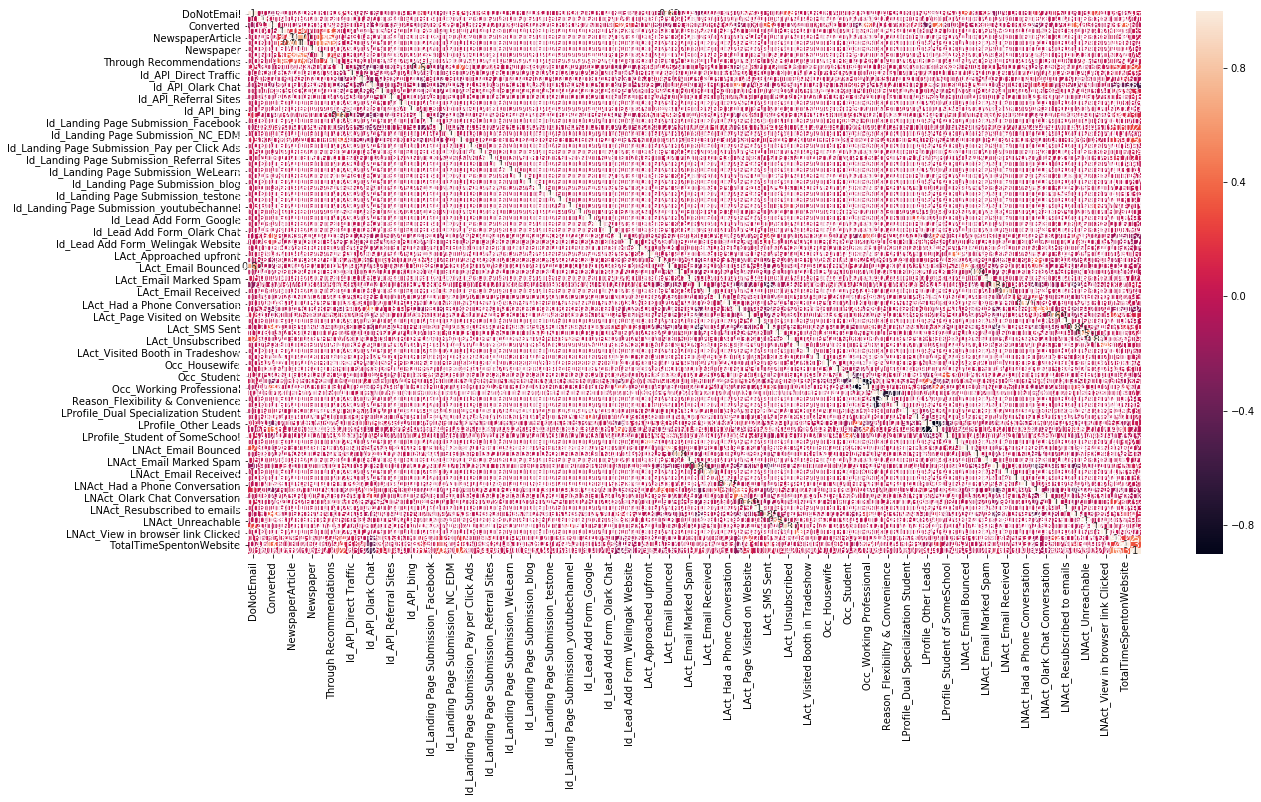

In [78]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

In [79]:
#its seriously difficult to get proper correlation here lets do feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True False  True False  True False False False False False  True
  True False False False False False False False False  True False False
 False  True False False False  True  True False  True  True False  True
 False False False False False False False False False False  True False
 False False False False False]
[ 1 22 53 29 55 21 28 25 75 12 13 26 11  7 37 41  8 17 10 33  9 54 51 56
 70 72 63 38  6 52 46 49 40 45 19 64  1  1 66  1  2  1 62 43 39 47 61  1
  1 60 18 23 71 42 65 73 50  1 44 27 15  1 31 30 74  1  1 16  1  1 69  1
 32 48 36 68 67  4 24 34 35 20  1  3 14 59 57  5 58]


In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('DoNotEmail', True, 1),
 ('DoNotCall', False, 22),
 ('Search', False, 53),
 ('NewspaperArticle', False, 29),
 ('XEducationForums', False, 55),
 ('Newspaper', False, 21),
 ('DigitalAdvertisement', False, 28),
 ('Through Recommendations', False, 25),
 ('AfreecopyofMasteringTheInterview', False, 75),
 ('ld_API_Direct Traffic', False, 12),
 ('ld_API_Google', False, 13),
 ('ld_API_Olark Chat', False, 26),
 ('ld_API_Organic Search', False, 11),
 ('ld_API_Referral Sites', False, 7),
 ('ld_API_Social Media', False, 37),
 ('ld_API_bing', False, 41),
 ('ld_Landing Page Submission_Direct Traffic', False, 8),
 ('ld_Landing Page Submission_Facebook', False, 17),
 ('ld_Landing Page Submission_Google', False, 10),
 ('ld_Landing Page Submission_NC_EDM', False, 33),
 ('ld_Landing Page Submission_Organic Search', False, 9),
 ('ld_Landing Page Submission_Pay per Click Ads', False, 54),
 ('ld_Landing Page Submission_Press_Release', False, 51),
 ('ld_Landing Page Submission_Referral Sites', False, 56),
 

In [81]:
col = X_train.columns[rfe.support_]

In [82]:
X_train.columns[~rfe.support_]

Index(['DoNotCall', 'Search', 'NewspaperArticle', 'XEducationForums',
       'Newspaper', 'DigitalAdvertisement', 'Through Recommendations',
       'AfreecopyofMasteringTheInterview', 'ld_API_Direct Traffic',
       'ld_API_Google', 'ld_API_Olark Chat', 'ld_API_Organic Search',
       'ld_API_Referral Sites', 'ld_API_Social Media', 'ld_API_bing',
       'ld_Landing Page Submission_Direct Traffic',
       'ld_Landing Page Submission_Facebook',
       'ld_Landing Page Submission_Google',
       'ld_Landing Page Submission_NC_EDM',
       'ld_Landing Page Submission_Organic Search',
       'ld_Landing Page Submission_Pay per Click Ads',
       'ld_Landing Page Submission_Press_Release',
       'ld_Landing Page Submission_Referral Sites',
       'ld_Landing Page Submission_Social Media',
       'ld_Landing Page Submission_WeLearn', 'ld_Landing Page Submission_bing',
       'ld_Landing Page Submission_blog', 'ld_Landing Page Submission_google',
       'ld_Landing Page Submission_testone',
 

In [72]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[col], y_train)


NameError: name 'X_train' is not defined

In [71]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

NameError: name 'sm' is not defined

In [85]:
#remove column with high p value
col = col.drop('LProfile_Lateral Student', 1)
col = col.drop('LProfile_Dual Specialization Student', 1)
col = col.drop('Occ_Housewife', 1)
col = col.drop('LAct_Approached upfront', 1)
col

Index(['DoNotEmail', 'ld_Lead Add Form_Reference',
       'ld_Lead Add Form_Welingak Website', 'LAct_Email Bounced',
       'LAct_Had a Phone Conversation', 'LAct_Olark Chat Conversation',
       'Occ_Working Professional', 'LProfile_Potential Lead',
       'LProfile_Student of SomeSchool', 'LNAct_Email Bounced',
       'LNAct_SMS Sent'],
      dtype='object')

In [86]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.8
Date:                Mon, 10 Jun 2019   Deviance:                       5813.6
Time:                        23:05:41   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.2932      0.045    -29.036      0.000      -1.380      -1.206
DoNotEmail                           -1.4091      0.186     -7.585      0.000      -1.773      -1.045
ld_Lead Add Form_Reference            2.2085      0.229      9.638      0.000       1.759       2.658
ld_Lead Add Form_Welingak Website     4.8170      0.723      6.666      0.000       3.401       6.233
LAct_Email Bounced                   -1.7775      0.616     -2.888      0.004      -2.984      -0.571
LAct_Had a Phone Conversation         2.3516      0.690      3.407      0.001       0.999       3.704
LAct_Olark Chat Conversation         -1.2579      0.150     -8.398      0.000      -1.551      -0.964
Occ_Working Professional              2.5395      0.182     13.959      0.000       2.183       2.896
LProfile_Potential Lead               1.8894      0.092     20.491      0.000       1.709       2.070
LProfile_Student of SomeSchool       -2.0392      0.494     -4.129      0.000      -3.007      -1.071
LNAct_Email Bounced                   2.1904      0.779      2.812      0.005       0.664       3.717
LNAct_SMS Sent                        1.6555      0.074     22.230      0.000       1.510       1.801
=====================================================================================================
"""

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[col], y_train)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                  LAct_Email Bounced  1.97
0                          DoNotEmail  1.75
7             LProfile_Potential Lead  1.29
9                 LNAct_Email Bounced  1.27
6            Occ_Working Professional  1.21
1          ld_Lead Add Form_Reference  1.20
10                     LNAct_SMS Sent  1.16
2   ld_Lead Add Form_Welingak Website  1.02
8      LProfile_Student of SomeSchool  1.02
5        LAct_Olark Chat Conversation  1.01
4       LAct_Had a Phone Conversation  1.00

In [90]:
#the vifs is very low that shows the variables have low multicollinearity
X_test[col].shape

col





Index(['DoNotEmail', 'ld_Lead Add Form_Reference',
       'ld_Lead Add Form_Welingak Website', 'LAct_Email Bounced',
       'LAct_Had a Phone Conversation', 'LAct_Olark Chat Conversation',
       'Occ_Working Professional', 'LProfile_Potential Lead',
       'LProfile_Student of SomeSchool', 'LNAct_Email Bounced',
       'LNAct_SMS Sent'],
      dtype='object')

In [91]:
#making prediction
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()


1
0  0.215315
1  0.958343
2  0.215315
3  0.714072
4  0.215315

In [92]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()



Converted
3271          0
1490          1
7936          0
4216          1
3830          0

In [93]:
# Putting App_ID to index
y_test_df['App_ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1*100],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Lead_score'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['App_ID','Converted','Lead_score'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()


App_ID  Converted  Lead_score
0    3271          0   21.531507
1    1490          1   95.834342
2    7936          0   21.531507
3    4216          1   71.407212
4    3830          0   21.531507

In [94]:
# Creating new column 'predicted' with 1 if lead_score>50 else 0
y_pred_final['predicted'] = y_pred_final.Lead_score.map( lambda x: 1 if x > 50 else 0)
# Let's see the head
y_pred_final.head()


App_ID  Converted  Lead_score  predicted
0    3271          0   21.531507          0
1    1490          1   95.834342          1
2    7936          0   21.531507          0
3    4216          1   71.407212          1
4    3830          0   21.531507          0

In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted))

0.7976496511200881


In [96]:
#Let's now check the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                  LAct_Email Bounced  1.97
0                          DoNotEmail  1.75
7             LProfile_Potential Lead  1.29
9                 LNAct_Email Bounced  1.27
6            Occ_Working Professional  1.21
1          ld_Lead Add Form_Reference  1.20
10                     LNAct_SMS Sent  1.16
2   ld_Lead Add Form_Welingak Website  1.02
8      LProfile_Student of SomeSchool  1.02
5        LAct_Olark Chat Conversation  1.01
4       LAct_Had a Phone Conversation  1.00

In [97]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[1479,  255],
       [ 296,  693]], dtype=int64)

In [98]:
#metrics beyond simple accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7007077856420627

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8529411764705882

In [101]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14705882352941177


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.7310126582278481


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8332394366197183


In [104]:
#plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Lead_score, drop_intermediate = False )

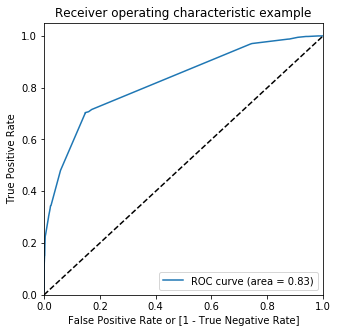

In [106]:
draw_roc(y_pred_final.Converted, y_pred_final.Lead_score)

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Lead_score.map(lambda x: 1 if x /100 > i else 0)
y_pred_final.head()

App_ID  Converted  Lead_score  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0    3271          0   21.531507          0    1    1    1    0    0    0   
1    1490          1   95.834342          1    1    1    1    1    1    1   
2    7936          0   21.531507          0    1    1    1    0    0    0   
3    4216          1   71.407212          1    1    1    1    1    1    1   
4    3830          0   21.531507          0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    1    1    1    1  
2    0    0    0    0  
3    1    1    0    0  
4    0    0    0    0

In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix



num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.363202  1.000000  0.000000
0.1   0.1  0.517811  0.968655  0.260669
0.2   0.2  0.517811  0.968655  0.260669
0.3   0.3  0.791774  0.707786  0.839677
0.4   0.4  0.798017  0.702730  0.852364
0.5   0.5  0.797650  0.700708  0.852941
0.6   0.6  0.773779  0.480283  0.941176
0.7   0.7  0.746970  0.343782  0.976932
0.8   0.8  0.735953  0.301314  0.983852
0.9   0.9  0.734851  0.297270  0.984429


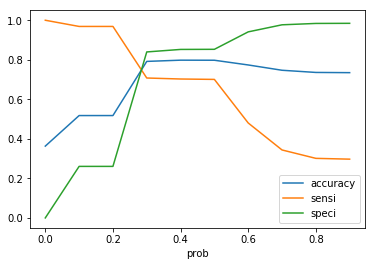

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [110]:
y_pred_final['final_predicted'] = y_pred_final.Lead_score.map( lambda x: 1 if x /100 > 0.3 else 0)

y_pred_final.head()

App_ID  Converted  Lead_score  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0    3271          0   21.531507          0    1    1    1    0    0    0   
1    1490          1   95.834342          1    1    1    1    1    1    1   
2    7936          0   21.531507          0    1    1    1    0    0    0   
3    4216          1   71.407212          1    1    1    1    1    1    1   
4    3830          0   21.531507          0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    1    1    1    1                1  
2    0    0    0    0                0  
3    1    1    0    0                1  
4    0    0    0    0                0

In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7917737789203085

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1456,  278],
       [ 289,  700]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7077856420626896

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.839677047289504

In [116]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16032295271049596


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7157464212678937


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))


0.8343839541547278


In [119]:
#Precision and Recall
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[1479,  255],
       [ 296,  693]], dtype=int64)

In [120]:
#Precision
#TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7310126582278481

In [121]:
#Recall
#TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7007077856420627

In [122]:
from sklearn.metrics import precision_score, recall_score

In [123]:
precision_score(y_pred_final.Converted, y_pred_final.predicted)

0.7310126582278481

In [124]:
recall_score(y_pred_final.Converted, y_pred_final.predicted)

0.7007077856420627

In [125]:
#Precision and recall tradeoff¶
from sklearn.metrics import precision_recall_curve

In [126]:
y_pred_final.Converted, y_pred_final.predicted

(0       0
 1       1
 2       0
 3       1
 4       0
 5       1
 6       0
 7       0
 8       1
 9       0
 10      1
 11      0
 12      0
 13      0
 14      1
 15      1
 16      1
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      1
 24      0
 25      1
 26      0
 27      1
 28      0
 29      0
        ..
 2693    0
 2694    1
 2695    0
 2696    0
 2697    0
 2698    1
 2699    1
 2700    1
 2701    0
 2702    0
 2703    1
 2704    0
 2705    0
 2706    1
 2707    0
 2708    0
 2709    0
 2710    0
 2711    1
 2712    1
 2713    0
 2714    0
 2715    1
 2716    1
 2717    0
 2718    0
 2719    0
 2720    1
 2721    0
 2722    0
 Name: Converted, Length: 2723, dtype: int64, 0       0
 1       1
 2       0
 3       1
 4       0
 5       1
 6       1
 7       0
 8       1
 9       0
 10      1
 11      0
 12      0
 13      0
 14      1
 15      0
 16      1
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      1
 24      0
 25      

In [127]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.predicted)

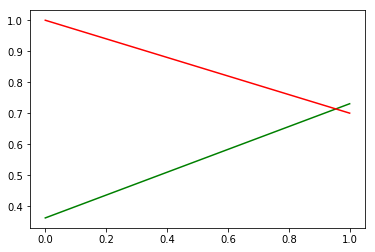

In [128]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()